In [2]:
import os
import cv2 #OpenCV
import numpy as np #Biblioteca Numerica
import matplotlib.pyplot as plt #Visualizaciones

In [10]:
imagenes = [
    "../imagenes/blancoNegro.png",
    "../imagenes/figuraV.png",
    "../imagenes/figuraV2.jpg",
    "../imagenes/figures.jpg",
    "../imagenes/gato1.jpg",
]

In [41]:
# Cruz 3x3
cruz_3x3 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# Diamante 5x5
diamante_5x5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

# Diamante 7x7 (corregido para que sea 7x7 real)
diamante_7x7 = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 0, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
], dtype=np.uint8)

# Barra vertical (5x1)
barra_vertical = np.array([
    [1],
    [1],
    [1],
    [1],
    [1]
], dtype=np.uint8)

# Barra horizontal (1x5)
barra_horizontal = np.array([
    [1, 1, 1, 1, 1]
], dtype=np.uint8)

# Patrón BlackWhiteBlack (1x3)
black_white_black = np.array([
    [0, 1, 0]
], dtype=np.uint8)


In [42]:
def dilation(img, kernel):
    height, width = img.shape
    k_height, k_width = kernel.shape
    pad_height, pad_width = k_height // 2, k_width // 2

    # Salida inicializada en ceros
    output_img = np.zeros((height, width), dtype=np.uint8)

    # Buscar los índices donde hay valor 1 (zonas blancas)
    indices = np.argwhere(img == 1)

    for i, j in indices:
        # Calcular los rangos válidos de la imagen
        i_start = max(i - pad_height, 0)
        i_end   = min(i + pad_height + 1, height)
        j_start = max(j - pad_width, 0)
        j_end   = min(j + pad_width + 1, width)

        # Calcular los rangos válidos del kernel
        k_i_start = pad_height - (i - i_start)
        k_i_end   = k_height - (i + pad_height + 1 - i_end)
        k_j_start = pad_width - (j - j_start)
        k_j_end   = k_width - (j + pad_width + 1 - j_end)

        # Aplicar el kernel recortado en la región válida
        output_img[i_start:i_end, j_start:j_end] |= kernel[k_i_start:k_i_end, k_j_start:k_j_end]

    return np.where(output_img > 0, 1, 0)


In [43]:
def erosion(img, kernel):
    kernel = np.array(kernel, dtype=np.uint8)
    height, width = img.shape
    k_height, k_width = kernel.shape
    pad_height, pad_width = k_height // 2, k_width // 2

    output_img = np.zeros((height, width), dtype=np.uint8)

    # Recorrer cada píxel de la imagen (evitar bordes si el kernel no cabe)
    for i in range(pad_height, height - pad_height):
        for j in range(pad_width, width - pad_width):
            # Región local de la imagen
            region = img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]

            # Recortar kernel si está en borde
            if region.shape != kernel.shape:
                continue

            # Erosión: si todos los 1s del kernel coinciden con 1s en la imagen
            if np.array_equal(region[kernel == 1], kernel[kernel == 1]):
                output_img[i, j] = 1

    return output_img

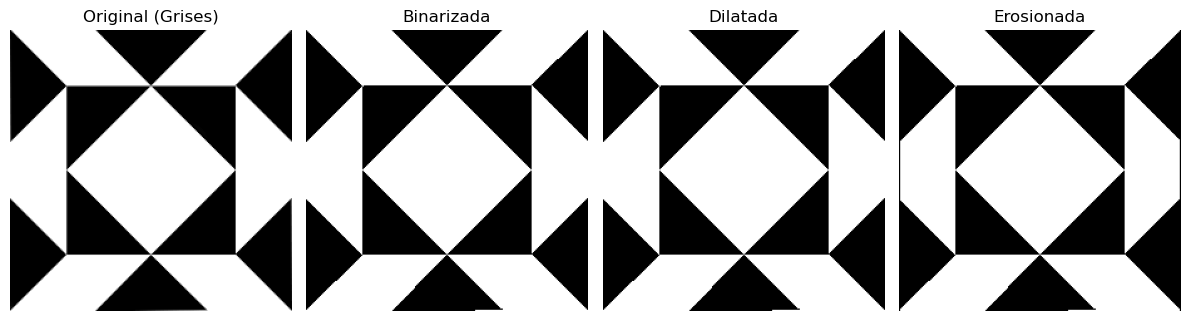

Matriz binarizada:
[[1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]

Matriz dilatada:
[[1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]

Matriz erosionada:
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]]


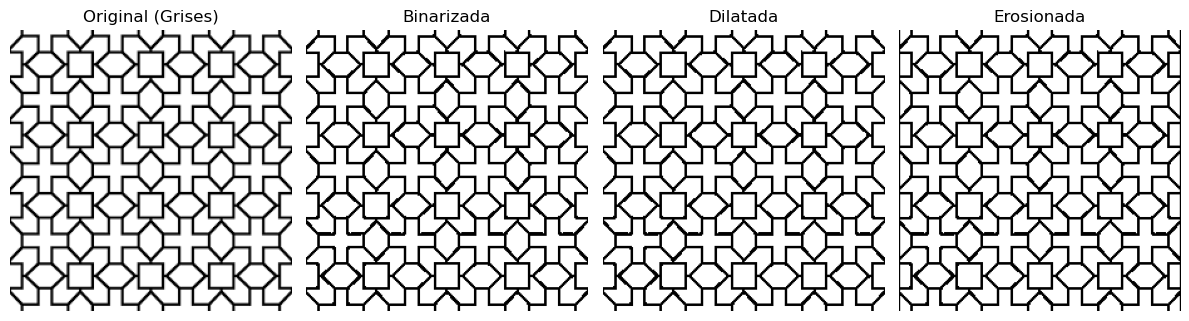

Matriz binarizada:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Matriz dilatada:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Matriz erosionada:
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]]


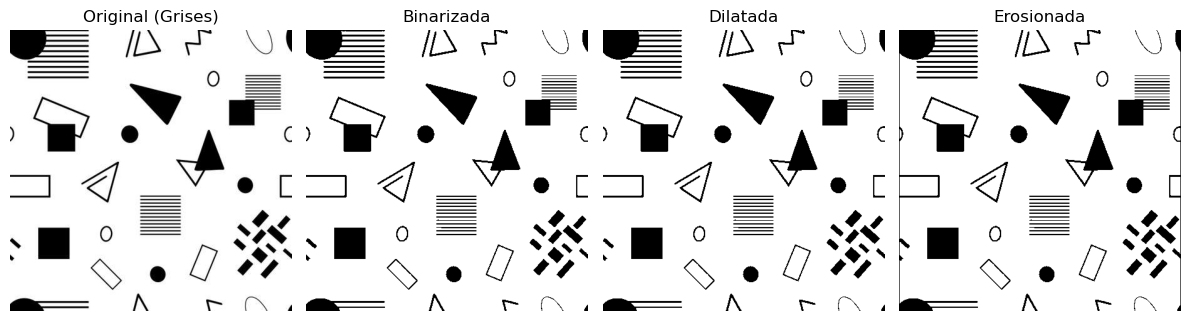

Matriz binarizada:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matriz dilatada:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matriz erosionada:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


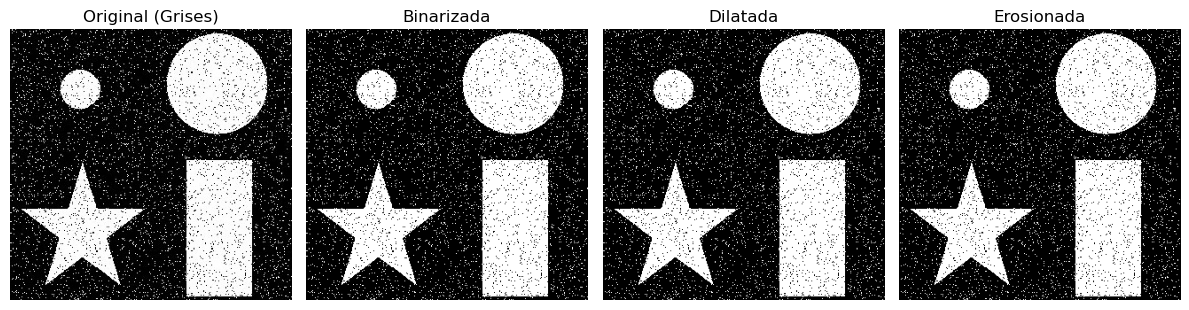

Matriz binarizada:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

Matriz dilatada:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

Matriz erosionada:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


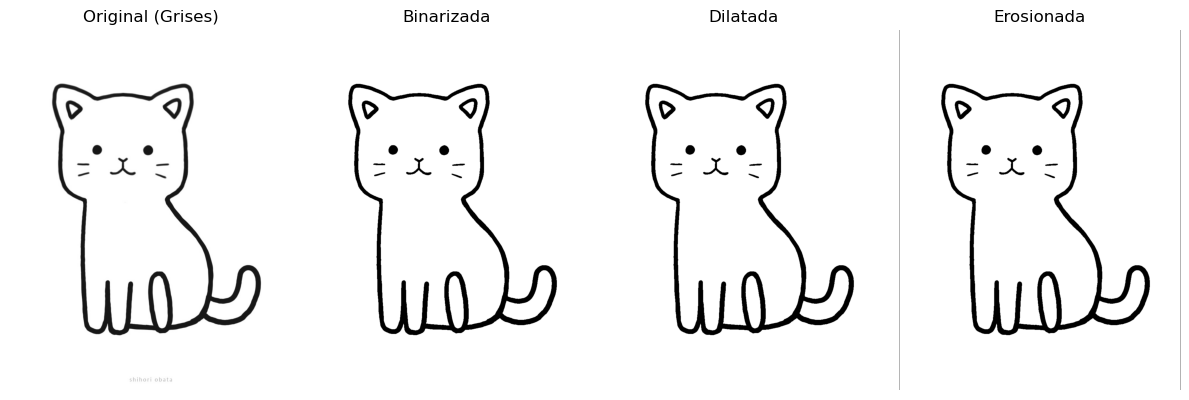

Matriz binarizada:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Matriz dilatada:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Matriz erosionada:
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]]


In [49]:
for path in imagenes:
    # Leer imagen en escala de grises
    image = cv2.imread(path, 0)

    # Binarizar con un umbral (por ejemplo, 127)
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Normalizar binaria para trabajar con 0 y 1
    binary_norm = binary // 255

    # Aplicar dilatación y erosión
    dilated_img = dilation(binary_norm, black_white_black)
    eroded_img = erosion(binary_norm, black_white_black)

    # Mostrar imágenes
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.title("Original (Grises)")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Binarizada")
    plt.imshow(binary, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Dilatada")
    plt.imshow(dilated_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Erosionada")
    plt.imshow(eroded_img, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Imprimir matrices si lo deseas
    print("Matriz binarizada:")
    print(binary_norm)

    print("\nMatriz dilatada:")
    print(dilated_img)

    print("\nMatriz erosionada:")
    print(eroded_img)
